In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from ipywidgets import *
import datetime

In [2]:
#Einlesen der Daten
df = pd.read_csv('Grundwasserstände_WTF.txt', sep='\t',header=0, index_col=0,usecols=['Messzeitpunkt','Wert'], parse_dates=True) #Einlesen Daten, parse_dates: Festlegung Daten als date values

print(df)


                 Wert
Messzeitpunkt        
2005-01-01     106.19
2005-02-01     106.25
2005-03-01     106.45
2005-04-01     106.48
2005-05-01     106.43
2005-06-01     106.34
2005-07-01     106.31
2005-08-01     106.52
2005-09-01     106.55
2005-10-01     106.51
2005-11-01     106.41
2005-12-01     106.39
2006-01-01     106.51
2006-02-01     106.45
2006-03-01     106.62
2006-04-01     106.72
2006-05-01     106.85
2006-06-01     106.81
2006-07-01     106.63
2006-08-01     106.40
2006-09-01     106.41
2006-10-01     106.27
2006-11-01     106.37
2006-12-01     106.45
2007-01-01     106.45


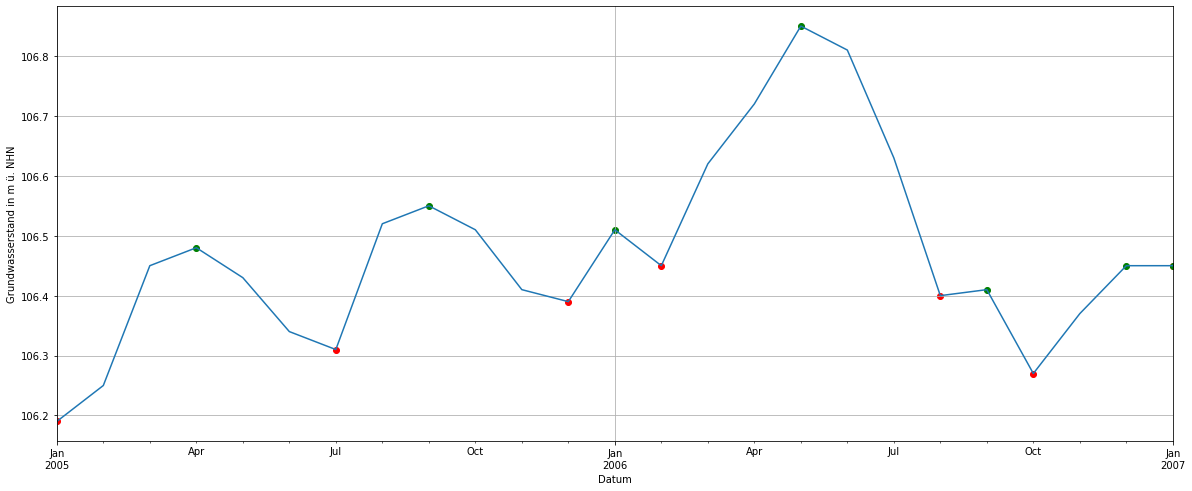

In [3]:
df['Wert'].plot(figsize=(20,8)) 
plt.xlabel('Datum') 
plt.ylabel('Grundwasserstand in m ü. NHN')
plt.grid(True)
plt.yscale('linear')

#lokale Peaks
n=1 #numbers of points to be checked before and after
df['min'] = df.iloc[argrelextrema(df.values, np.less_equal,
                    order=n)[0]]['Wert']
df['max'] = df.iloc[argrelextrema(df.values, np.greater_equal,
                    order=n)[0]]['Wert']


plt.scatter(df.index, df['min'], c='r', label='Minimum')
plt.scatter(df.index, df['max'], c='g',label='Maximum')

plt.show()




In [4]:
#Anzeige Minimum und Maximum
display(df['min'])
display(df['max'])


Messzeitpunkt
2005-01-01    106.19
2005-02-01       NaN
2005-03-01       NaN
2005-04-01       NaN
2005-05-01       NaN
2005-06-01       NaN
2005-07-01    106.31
2005-08-01       NaN
2005-09-01       NaN
2005-10-01       NaN
2005-11-01       NaN
2005-12-01    106.39
2006-01-01       NaN
2006-02-01    106.45
2006-03-01       NaN
2006-04-01       NaN
2006-05-01       NaN
2006-06-01       NaN
2006-07-01       NaN
2006-08-01    106.40
2006-09-01       NaN
2006-10-01    106.27
2006-11-01       NaN
2006-12-01       NaN
2007-01-01    106.45
Name: min, dtype: float64

Messzeitpunkt
2005-01-01       NaN
2005-02-01       NaN
2005-03-01       NaN
2005-04-01    106.48
2005-05-01       NaN
2005-06-01       NaN
2005-07-01       NaN
2005-08-01       NaN
2005-09-01    106.55
2005-10-01       NaN
2005-11-01       NaN
2005-12-01       NaN
2006-01-01    106.51
2006-02-01       NaN
2006-03-01       NaN
2006-04-01       NaN
2006-05-01    106.85
2006-06-01       NaN
2006-07-01       NaN
2006-08-01       NaN
2006-09-01    106.41
2006-10-01       NaN
2006-11-01       NaN
2006-12-01    106.45
2007-01-01    106.45
Name: max, dtype: float64

In [5]:
def GWN(Sy,delta_h,delta_t):
    R=Sy*(delta_h/delta_t)
    print('Die Grundwasserneubildung R beträgt {} mm/a'.format(R))
interactive(GWN,
    Sy=widgets.BoundedFloatText(value=0, min=0, max=1),
    delta_h=widgets.BoundedFloatText(value=0,min=0,description='Summe Änderung GWS [mm]'),
    delta_t=widgets.BoundedFloatText(value=2, min=0,description='Änderung Zeit [a]'))

interactive(children=(BoundedFloatText(value=0.0, description='Sy', max=1.0), BoundedFloatText(value=0.0, desc…